In [28]:
import csv
import pandas as pd
import zipfile
import os

zip_file_path = 'filtered_sales_data_SP500_04_23.zip'
extract_dir = './'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Zip file extracted successfully!")

df_filtered = pd.read_csv('./filtered_sales_data_SP500_04_23.csv', low_memory=False)
df_filtered = df_filtered.drop(columns=['Unnamed: 0'], axis=1)

# Modelling output
Y = df_filtered["sale_price"]
df_filtered = df_filtered.drop(columns=["sale_price"], axis=1)

# Categorical columns
categorical_cols = []
file_name = './categorical_col_names_SP500_04_23.csv'
# Open the CSV file and read its contents into the list
with open(file_name, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        categorical_cols.append(row[0])
df_filtered[categorical_cols] = df_filtered[categorical_cols].astype('category')

# Numerical columns
numerical_cols = []
file_name = './numerical_col_names_SP500_04_23.csv'
# Open the CSV file and read its contents into the list
with open(file_name, 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        numerical_cols.append(row[0])

print(categorical_cols)
print(len(categorical_cols))

print(numerical_cols)
print(len(numerical_cols))

print(df_filtered.shape)
# print(df_filtered.dtypes)

Zip file extracted successfully!
['BsmtCode', 'CD', 'Council', 'HealthCent', 'IrrLotCode', 'LandUse', 'LotType', 'PolicePrct', 'SchoolDist', 'TaxMap', 'ZoneDist1', 'building_class_at_sale', 'building_class_category', 'neighborhood', 'tax_class', 'tax_class_at_sale', 'zip_code']
17
['residential_units', 'commercial_units', 'land_sqft', 'gross_sqft', 'year_built', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'UnitsRes', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord', 'zip_code_rank', 'years_since_built', 'years_since_last_alteration', 'years_since_sold', 'avg_sale_price_3m', 'avg_sale_price_1y', 'avg_sale_price_2y', 'SP500_price_day_close', 'IYR_price_day_close', 'inflation_CPI_annual']
41
(145027, 58)


In [29]:
import pandas as pd
import csv

# Load the main DataFrame
df_filtered = pd.read_csv('./filtered_sales_data_SP500_04_23.csv', low_memory=False)
df_filtered = df_filtered.drop(columns=['Unnamed: 0'], axis=1)

# Extract the target variable into a vector y
y = df_filtered["sale_price"]

# Load numerical column names from a file
numerical_cols = []
with open('./numerical_col_names_SP500_04_23.csv', 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        numerical_cols.append(row[0])

# Ensure 'sale_price' is not in the numerical columns list (in case it was listed as a numerical column)
if 'sale_price' in numerical_cols:
    numerical_cols.remove('sale_price')

# Create a numerical DataFrame by selecting the numerical columns from the main DataFrame
numerical_data = df_filtered[numerical_cols]

print("Numerical columns:")
print(numerical_cols)
print("Number of numerical columns:", len(numerical_cols))
print("Shape of numerical DataFrame:", numerical_data.shape)

# Optionally, check the data types to confirm they are all numerical
print("Data types in the numerical DataFrame:")
print(numerical_data.dtypes)



Numerical columns:
['residential_units', 'commercial_units', 'land_sqft', 'gross_sqft', 'year_built', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors', 'UnitsRes', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'AssessLand', 'AssessTot', 'ExemptLand', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord', 'zip_code_rank', 'years_since_built', 'years_since_last_alteration', 'years_since_sold', 'avg_sale_price_3m', 'avg_sale_price_1y', 'avg_sale_price_2y', 'SP500_price_day_close', 'IYR_price_day_close', 'inflation_CPI_annual']
Number of numerical columns: 41
Shape of numerical DataFrame: (145027, 41)
Data types in the numerical DataFrame:
residential_units                int64
commercial_units                 int64
land_sqft                      float64
gross_sqft                     float64
year_built                       int64
LotArea                        float64
Bldg

Mean Squared Error: 3685784035511.552
Root Mean Squared Error: 1919839.585879912
R^2 Score: 0.6483891562230444


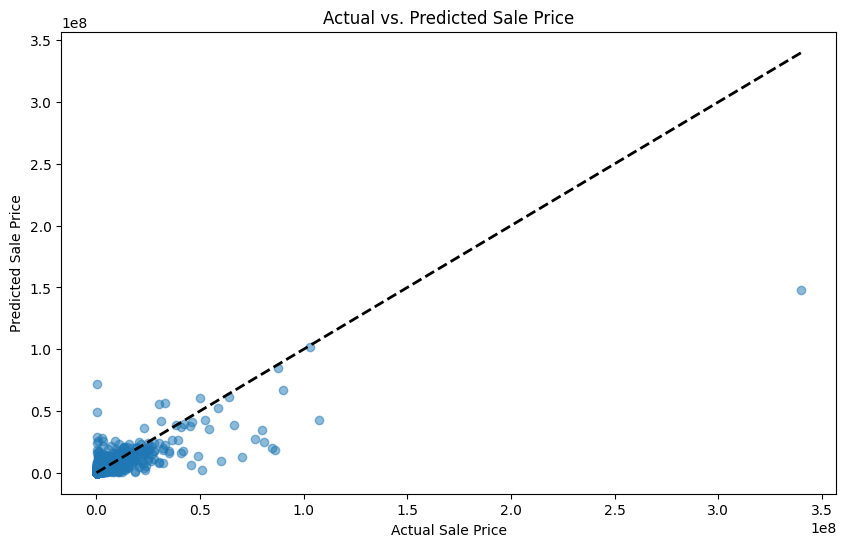

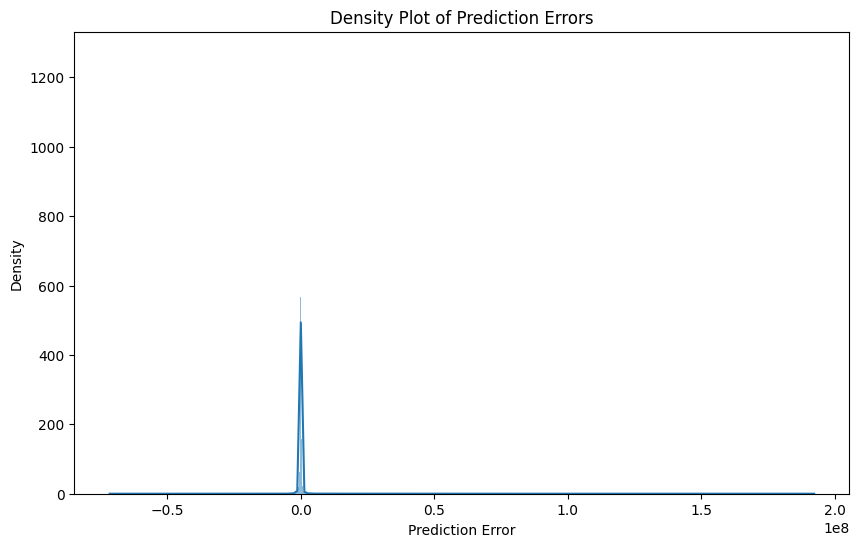

<ipython-input-13-d95066124f28>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


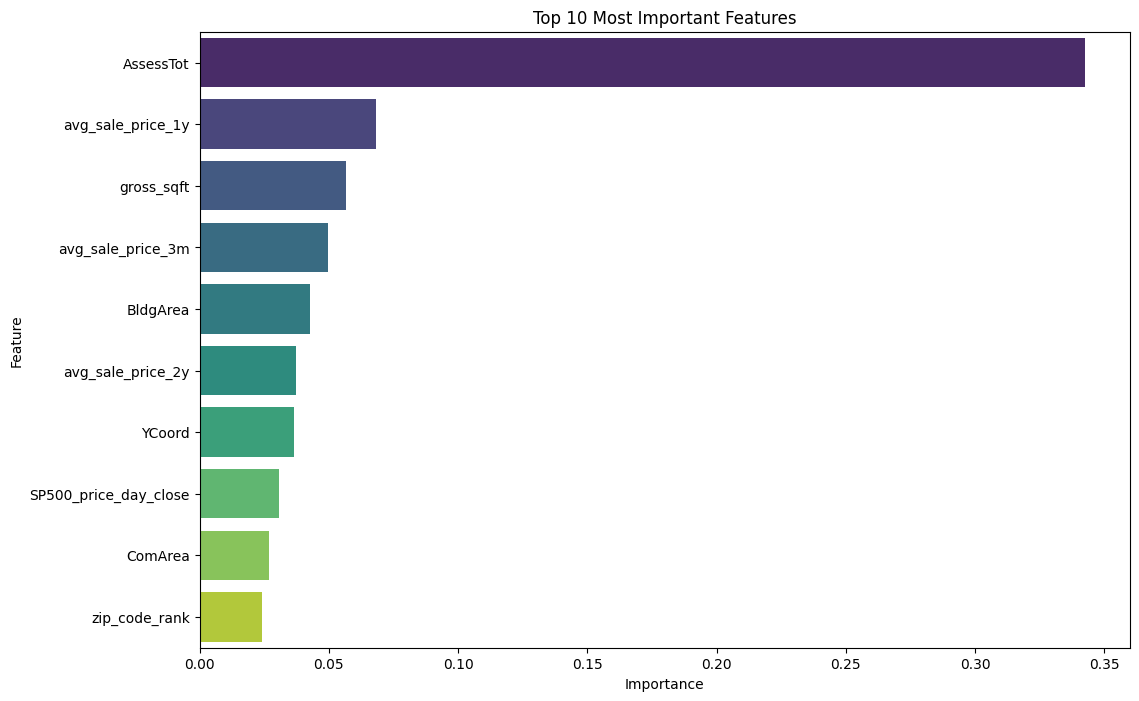

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'numerical_data' only contains features and 'y' is the target variable already extracted

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(numerical_data, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_

# Creating a DataFrame to store features and their importance
features_df = pd.DataFrame({
    'Feature': numerical_data.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame to find the most important features
features_df = features_df.sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [14]:
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Percentage Error (MAPE): 102.61976401789327%


Mean Squared Error: 221376513830.19034
Root Mean Squared Error: 470506.65652059624
R^2 Score: 0.7022057139208447


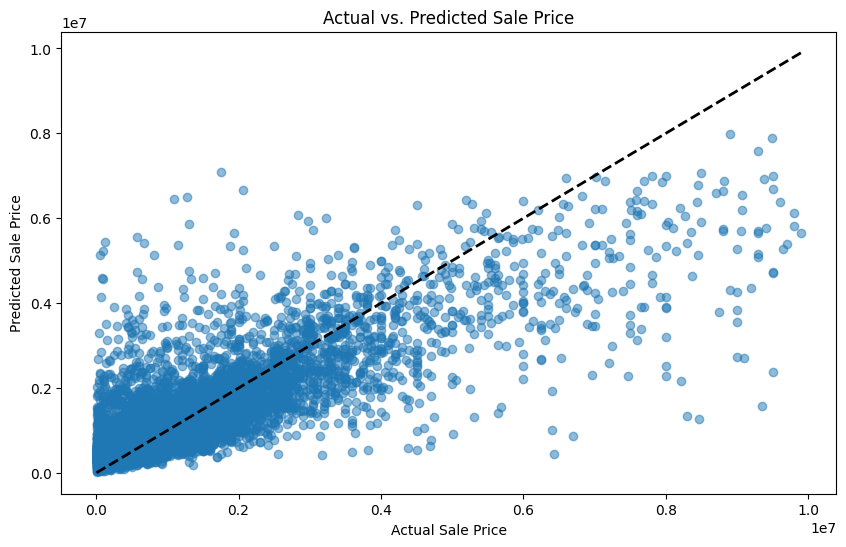

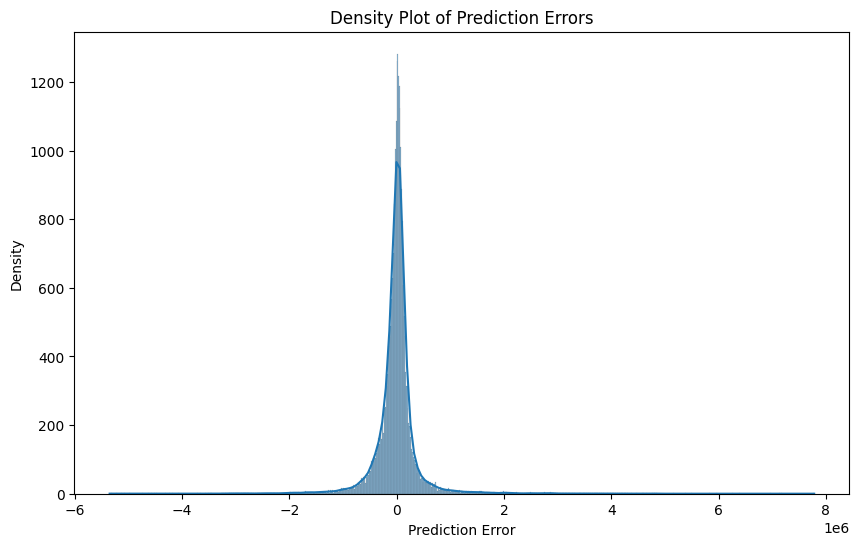

<ipython-input-24-b72c8792ecec>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


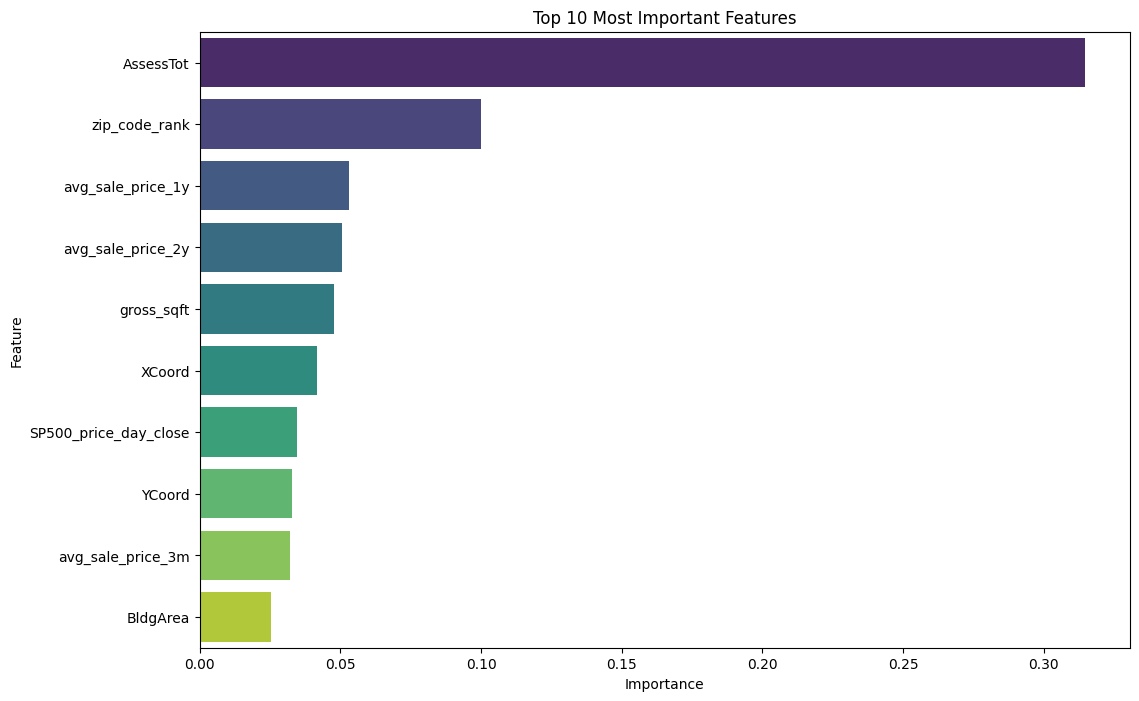

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices less than 10 million dollars
filtered_indices = y < 10_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
# Getting and printing all the parameters of the RandomForestRegressor
rf_params = rf_regressor.get_params()
print("Parameters used in RandomForestRegressor:")
for param, value in rf_params.items():
    print(f"{param}: {value}")

Parameters used in RandomForestRegressor:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [26]:
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Percentage Error (MAPE): 96.81560791058332%


Reduced Mean Squared Error: 263267226230.5284
Reduced Root Mean Squared Error: 513095.7281351389
Reduced R^2 Score: 0.64585459258114


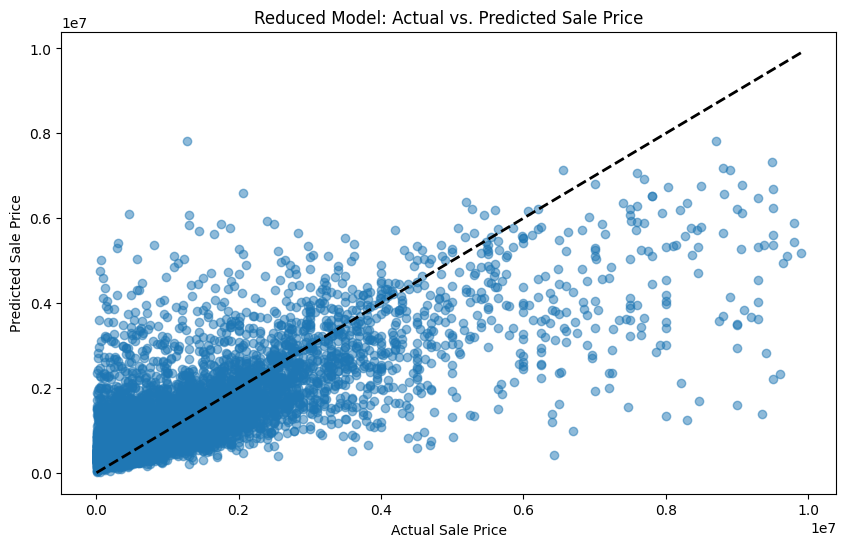

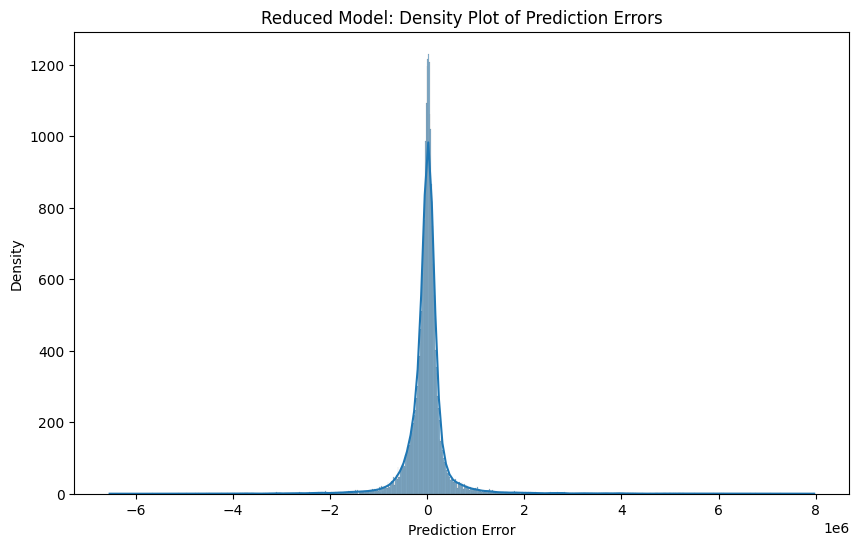

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the previous steps are already done and we have 'feature_importances' and 'filtered_features'

# Select the top 15 features
top_features = features_df.head(15)['Feature']

# Filter the dataset to include only the top 15 features
reduced_features = filtered_features[top_features]

# Splitting the reduced data into train and test sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the new Random Forest Regressor model using only the top 15 features
rf_regressor_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_reduced.fit(X_train_reduced, y_train_reduced)

# Predicting the test set results with the new model
y_pred_reduced = rf_regressor_reduced.predict(X_test_reduced)

# Evaluating the new model
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)
print(f"Reduced Mean Squared Error: {mse_reduced}")
print(f"Reduced Root Mean Squared Error: {rmse_reduced}")
print(f"Reduced R^2 Score: {r2_reduced}")

# Plotting Actual vs. Predicted Values for the new model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reduced, y_pred_reduced, alpha=0.5)
plt.plot([y_test_reduced.min(), y_test_reduced.max()], [y_test_reduced.min(), y_test_reduced.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Reduced Model: Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors for the new model
errors_reduced = y_test_reduced - y_pred_reduced

# Plotting Error Density for the new model
plt.figure(figsize=(10, 6))
sns.histplot(errors_reduced, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Reduced Model: Density Plot of Prediction Errors')
plt.show()


Range of 'years_since_sold': min     1
max    15
Name: years_since_sold, dtype: int64
Number of data points for each year since sold:
years_since_sold
1      8355
2      8754
3      9306
4      9296
5      8747
6      7544
7      6374
8      6424
9      5725
10     7208
11     9987
12    13208
13    14710
14    15528
15    13861
Name: count, dtype: int64


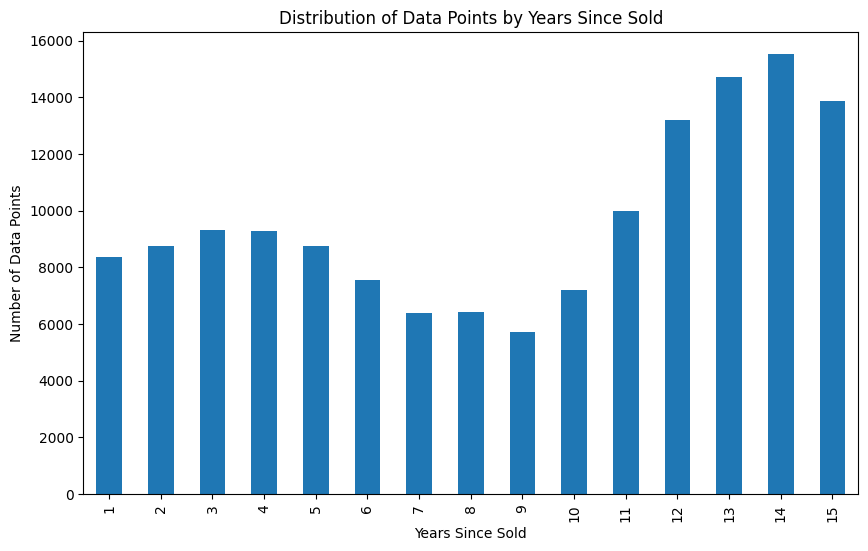

In [18]:
import pandas as pd

# Assuming 'numerical_data' is already loaded and includes 'years_since_sold'

# Display the range of 'years_since_sold'
years_range = numerical_data['years_since_sold'].agg(['min', 'max'])
print("Range of 'years_since_sold':", years_range)

# Calculate the number of data points for each year since sold
years_count = numerical_data['years_since_sold'].value_counts().sort_index()
print("Number of data points for each year since sold:")
print(years_count)

# Visualizing the distribution of 'years_since_sold'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
years_count.plot(kind='bar')
plt.xlabel('Years Since Sold')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points by Years Since Sold')
plt.show()


Mean Squared Error: 533120470498.66815
Root Mean Squared Error: 730150.9915754879
R^2 Score: 0.5050148702284276


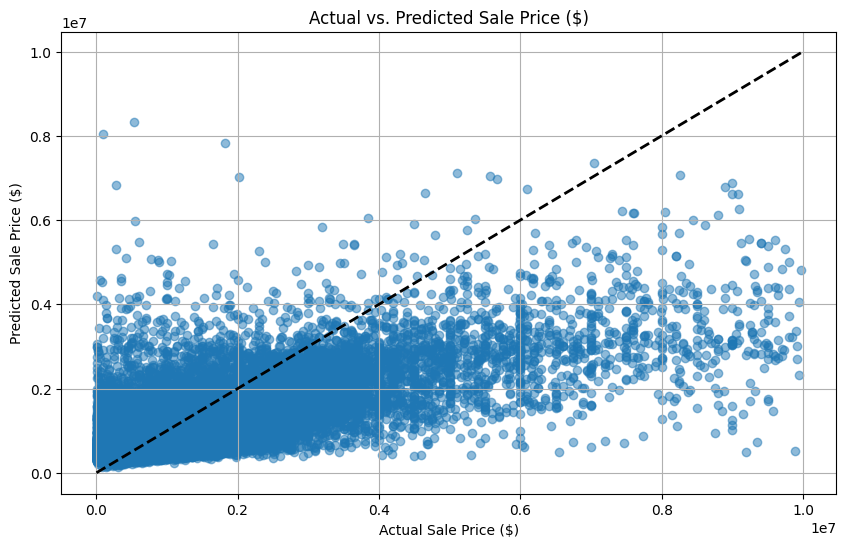

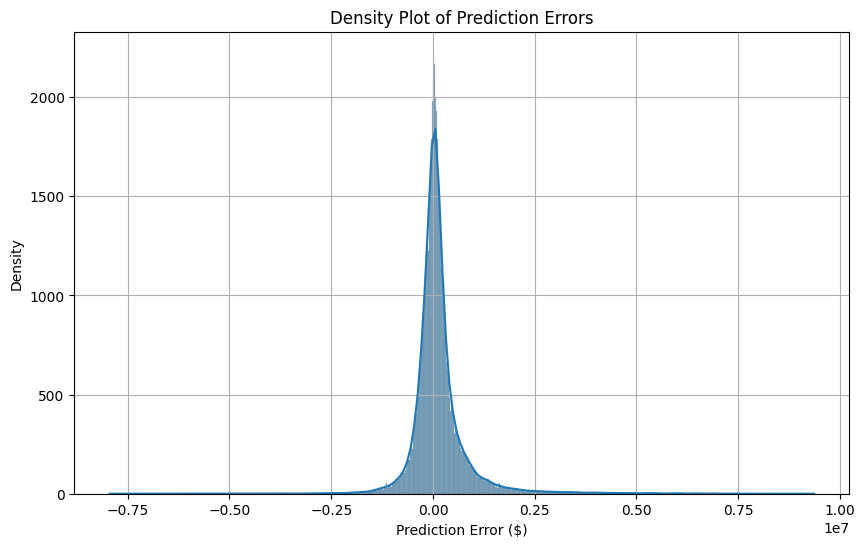

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' and 'y' are already loaded

# Filter the data to include only sale prices less than 10 million dollars
filtered_indices = y < 10_000_000
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Further filtering by 'years_since_sold'
# Train on data where 'years_since_sold' is more than 10 years
train_indices = filtered_features['years_since_sold'] > 8
X_train = filtered_features[train_indices]
y_train = filtered_target[train_indices]

# Test on data where 'years_since_sold' is 10 years or less
test_indices = filtered_features['years_since_sold'] <= 8
X_test = filtered_features[test_indices]
y_test = filtered_target[test_indices]

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Actual vs. Predicted Sale Price ($)')
plt.grid(True)

plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error ($)')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.grid(True)

plt.show()


<ipython-input-20-fa314c71f512>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


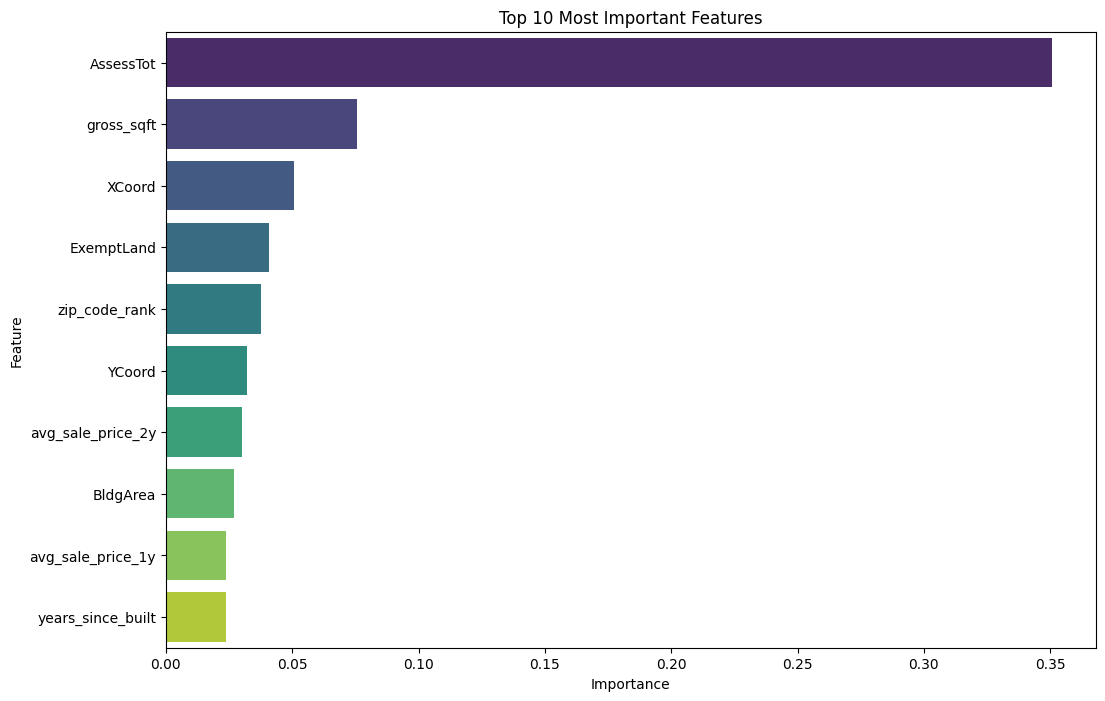

In [20]:
# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [21]:
# Function to calculate MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero
    y_true = np.where(y_true == 0, np.finfo(float).eps, y_true)  # Replace 0 with a very small number
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Percentage Error (MAPE): 133.1793873287922%


Mean Squared Error: 230278578870.44968
Root Mean Squared Error: 479873.5029884956
R^2 Score: 0.69654451752672


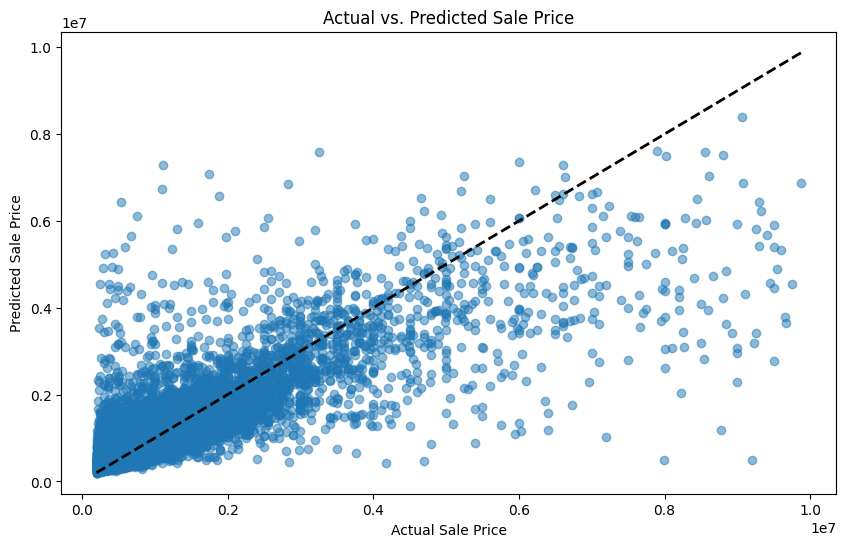

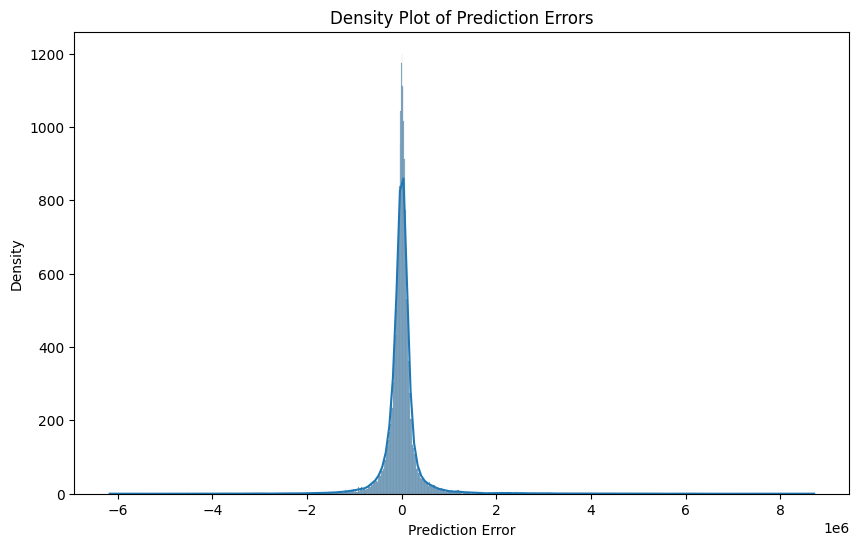

<ipython-input-23-05880592f63c>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


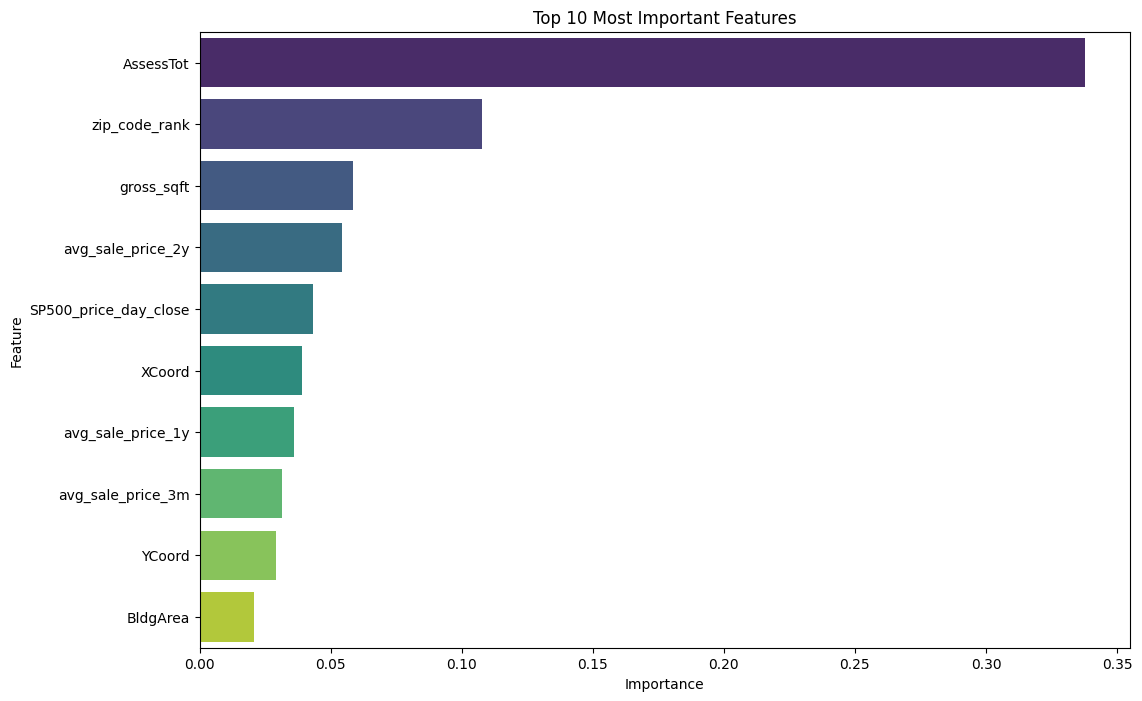

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_data' contains features and 'y' is the sale price extracted

# Filter the data to include only sale prices between $50,000 and $2,000,000
filtered_indices = (y > 200_000) & (y < 10_000_000)
filtered_features = numerical_data[filtered_indices]
filtered_target = y[filtered_indices]

# Splitting the filtered data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(filtered_features, filtered_target, test_size=0.2, random_state=42)

# Creating and training the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Plotting Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line representing perfect predictions
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Price')
plt.show()

# Calculating Errors
errors = y_test - y_pred

# Plotting Error Density
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Density Plot of Prediction Errors')
plt.show()

# Extracting feature importances
feature_importances = rf_regressor.feature_importances_
features_df = pd.DataFrame({
    'Feature': filtered_features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

# Plotting the 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
